In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"E:\Downloads\Copper_Set.xlsx - Result 1.csv")
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [3]:
df.shape

(181673, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [5]:
df.describe()

,item_date,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05,1.816720e+05
mean,2.020459e+07,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,2.020738e+07,1.918036e+03
std,4.551119e+03,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,2.411059e+04,3.317956e+05
min,1.995000e+07,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2.019040e+07,-1.160000e+03
25%,2.020093e+07,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2.020110e+07,6.690000e+02
50%,2.020113e+07,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2.021010e+07,8.120000e+02
75%,2.021020e+07,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2.021040e+07,9.530000e+02
max,2.021040e+07,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,3.031010e+07,1.000010e+08


In [6]:
columns = df.columns.tolist()

In [7]:
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [8]:
df.nunique()

id               181671
item_date           252
quantity tons    181673
customer           1169
country              17
status                9
item type             7
application          30
thickness           594
width              1386
material_ref      16563
product_ref          33
delivery date        28
selling_price      9795
dtype: int64

In [9]:
df['status'].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable', nan], dtype=object)

In [10]:
df = df[df['status'].isin(['Won', 'Lost'])]

In [11]:
df['status'].unique()

array(['Won', 'Lost'], dtype=object)

In [12]:
df['id'] = df['id'].astype('string') 
df['item_date'] = pd.to_datetime(df['item_date'], unit='s', errors='coerce').dt.date 
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce') 
df['customer'] = df['customer'].astype('int64', errors='ignore')
df['country'] = df['country'].astype('category')
df['status'] = df['status'].astype('string')
df['item type'] = df['item type'].astype('category')
df['application'] = pd.to_numeric(df['application'], errors='coerce') 
df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce') 
df['width'] = pd.to_numeric(df['width'], errors='coerce')  
df['material_ref'] = df['material_ref'].astype('string') 
df['product_ref'] = df['product_ref'].astype('int64')  
df['delivery date'] = pd.to_datetime(df['delivery date'], unit='s', errors='coerce').dt.date
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')  

In [13]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,1970-08-22,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,1970-08-22,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,1970-08-22,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,1970-08-22,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,1970-08-22,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,1970-08-22,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,1970-08-22,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,1970-08-22,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,1970-08-22,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,1970-08-22,577.00


In [14]:
df['id'] = df['id'].fillna('not available') 
df['item_date'].fillna(method='ffill', inplace=True) 
df['quantity tons'].fillna(df['quantity tons'].median(), inplace=True) 
df['customer'].fillna(df['customer'].mode().iloc[0], inplace=True)
df['country'].fillna(df['country'].mode().iloc[0], inplace=True)
df['status'].fillna('Not Provided', inplace=True)
df['item type'].fillna(df['item type'].mode().iloc[0], inplace=True)
df['application'].fillna('Not Specified', inplace=True)
df['thickness'].fillna(df['thickness'].median(), inplace=True)
df['width'].fillna(df['width'].median(), inplace=True)
df['material_ref'].fillna(df['material_ref'].mode().iloc[0], inplace=True)
df['product_ref'].fillna(df['product_ref'].mode().iloc[0], inplace=True)
df['delivery date'].fillna(method='ffill', inplace=True)
df['selling_price'].fillna(df['selling_price'].median(), inplace=True)

In [15]:
df.tail()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
181668,DE633116-D1DF-4846-982E-55EFC3658A76,1970-08-22,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,1970-08-22,591.0
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,1970-08-22,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,1970-08-22,589.0
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,1970-08-22,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,1970-08-22,619.0
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,1970-08-22,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,1970-08-22,601.0
181672,AD0CA853-AE3C-4B2F-9FBB-8B0B965F84BC,1970-08-22,406.686538,30200854.0,25.0,Won,W,41.0,0.71,1240.0,0000000000000000000000000000000001005439,164141591,1970-08-22,607.0


In [16]:
df['item_date_year'] = pd.to_datetime(df['item_date']).dt.year.astype('object')
df['item_date_month'] = pd.to_datetime(df['item_date']).dt.month.astype('object')
df['item_date_day'] = pd.to_datetime(df['item_date']).dt.day.astype('object')
df['delivery date year'] = pd.to_datetime(df['delivery date']).dt.year.astype('object')
df['delivery date month'] = pd.to_datetime(df['delivery date']).dt.month.astype('object')
df['delivery date day'] = pd.to_datetime(df['delivery date']).dt.day.astype('object')

In [17]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,item_date_year,item_date_month,item_date_day,delivery date year,delivery date month,delivery date day
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,1970-08-22,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,1970-08-22,854.00,1970,8,22,1970,8,22
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,1970-08-22,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,1970-08-22,1047.00,1970,8,22,1970,8,22
2,E140FF1B-2407-4C02-A0DD-780A093B1158,1970-08-22,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,1970-08-22,644.33,1970,8,22,1970,8,22
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,1970-08-22,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,1970-08-22,768.00,1970,8,22,1970,8,22
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,1970-08-22,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,1970-08-22,577.00,1970,8,22,1970,8,22


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150448 entries, 0 to 181672
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   id                   150448 non-null  string  
 1   item_date            150448 non-null  object  
 2   quantity tons        150448 non-null  float64 
 3   customer             150448 non-null  float64 
 4   country              150448 non-null  category
 5   status               150448 non-null  string  
 6   item type            150448 non-null  category
 7   application          150448 non-null  object  
 8   thickness            150448 non-null  float64 
 9   width                150448 non-null  float64 
 10  material_ref         150448 non-null  string  
 11  product_ref          150448 non-null  int64   
 12  delivery date        150448 non-null  object  
 13  selling_price        150448 non-null  float64 
 14  item_date_year       150448 non-null  object  
 15  item_

In [19]:
df.isnull().sum()

id                     0
item_date              0
quantity tons          0
customer               0
country                0
status                 0
item type              0
application            0
thickness              0
width                  0
material_ref           0
product_ref            0
delivery date          0
selling_price          0
item_date_year         0
item_date_month        0
item_date_day          0
delivery date year     0
delivery date month    0
delivery date day      0
dtype: int64

In [20]:
df.dtypes

id                     string[python]
item_date                      object
quantity tons                 float64
customer                      float64
country                      category
status                 string[python]
item type                    category
application                    object
thickness                     float64
width                         float64
material_ref           string[python]
product_ref                     int64
delivery date                  object
selling_price                 float64
item_date_year                 object
item_date_month                object
item_date_day                  object
delivery date year             object
delivery date month            object
delivery date day              object
dtype: object

In [21]:
from scipy.stats import skew

In [22]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in df.columns:
    if df[column].dtype == 'object' and column != 'item_date' and column != 'delivery date':
        df[column] = df[column].astype(str) 
        df[column] = label_encoder.fit_transform(df[column])
    elif df[column].dtype == 'category':
        df[column] = label_encoder.fit_transform(df[column])
    elif df[column].dtype == 'string':
        df[column] = label_encoder.fit_transform(df[column])

<Axes: ylabel='quantity tons'>

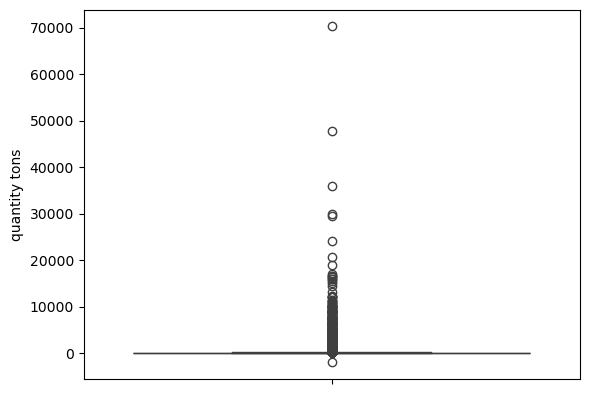

In [23]:
sns.boxplot(y='quantity tons',data=df)

<Axes: ylabel='thickness'>

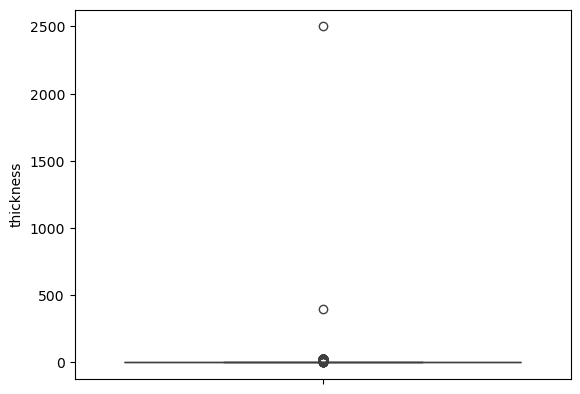

In [24]:
sns.boxplot(y='thickness',data=df)

<Axes: ylabel='width'>

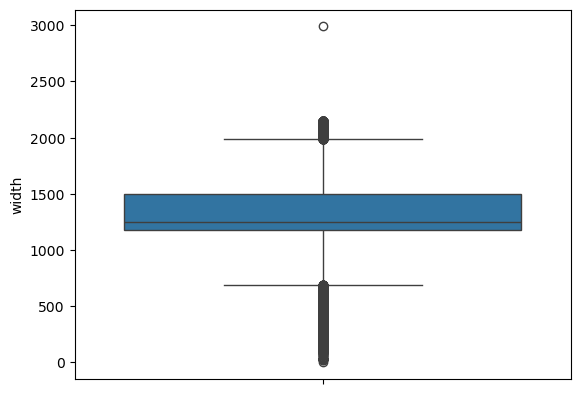

In [25]:
sns.boxplot(y='width',data=df)

<Axes: ylabel='selling_price'>

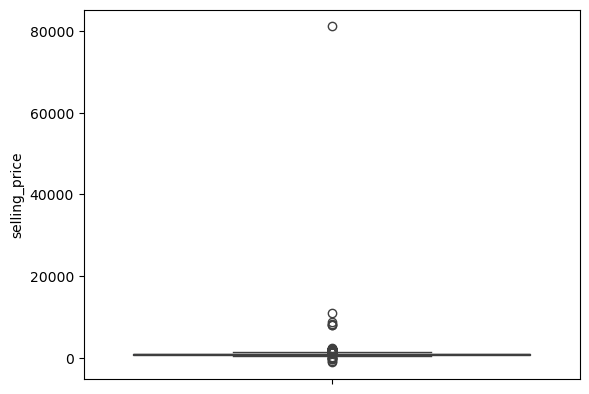

In [26]:
sns.boxplot(y='selling_price',data=df)

In [27]:
def remove_duplicates(col_name):

    Q1 = col_name.quantile(0.25)
    Q3 = col_name.quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return lower_bound, upper_bound

In [28]:
min, max = remove_duplicates(df['thickness'])
df['thickness'] = np.where(df['thickness']>max,max,df['thickness'])
df['thickness'] = np.where(df['thickness']<min,min,df['thickness'])

<Axes: ylabel='thickness'>

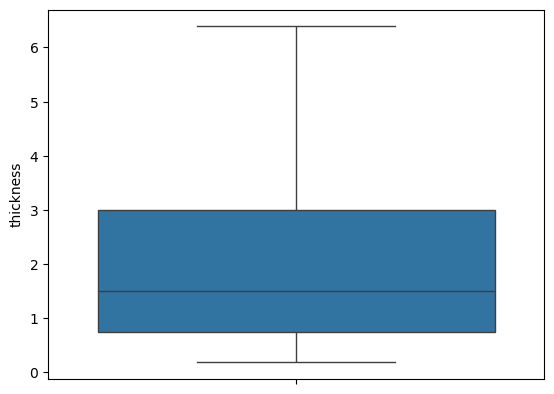

In [29]:
sns.boxplot(y='thickness',data=df)

In [30]:
min, max = remove_duplicates(df['quantity tons'])
df['quantity tons'] = np.where(df['quantity tons']>max,max,df['quantity tons'])
df['quantity tons'] = np.where(df['quantity tons']<min,min,df['quantity tons'])

<Axes: ylabel='quantity tons'>

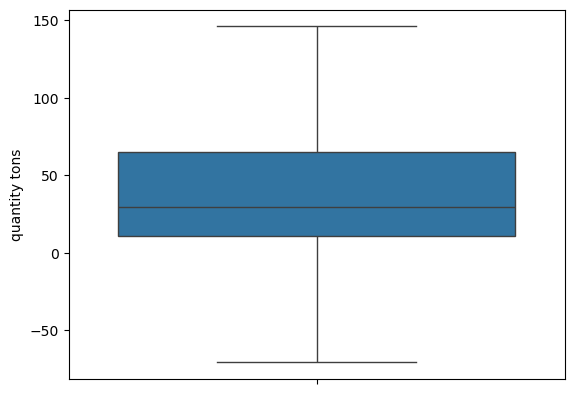

In [31]:
sns.boxplot(y='quantity tons',data=df)

In [32]:
min, max = remove_duplicates(df['width'])
df['width'] = np.where(df['width']>max,max,df['width'])
df['width'] = np.where(df['width']<min,min,df['width'])

<Axes: ylabel='width'>

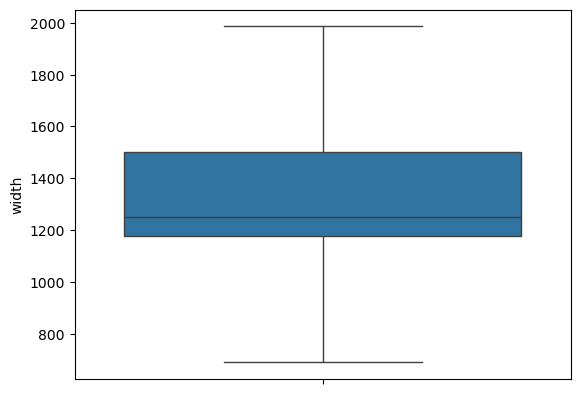

In [33]:
sns.boxplot(y='width',data=df)

In [34]:
min, max = remove_duplicates(df['selling_price'])
df['selling_price'] = np.where(df['selling_price']>max,max,df['selling_price'])
df['selling_price'] = np.where(df['selling_price']<min,min,df['selling_price'])

<Axes: ylabel='selling_price'>

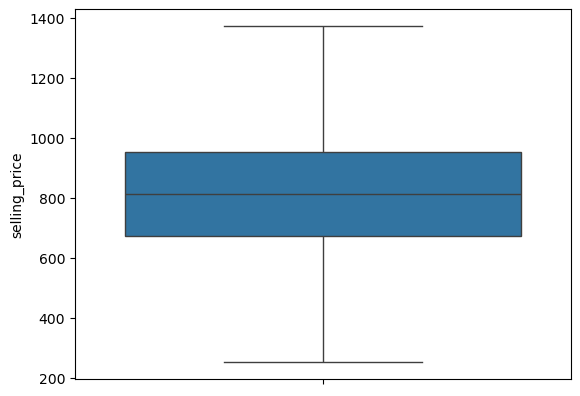

In [35]:
sns.boxplot(y='selling_price',data=df)

Processing column: id
Skewness: 1.2170874469891517e-18
Using 10000 random samples from 150448 rows.


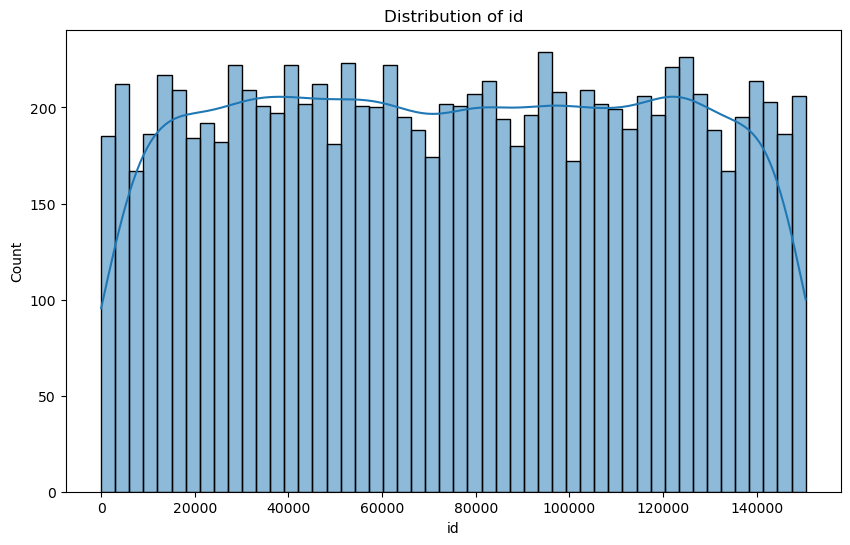

Processing column: quantity tons
Skewness: 1.1043254809703622
Using 10000 random samples from 150448 rows.


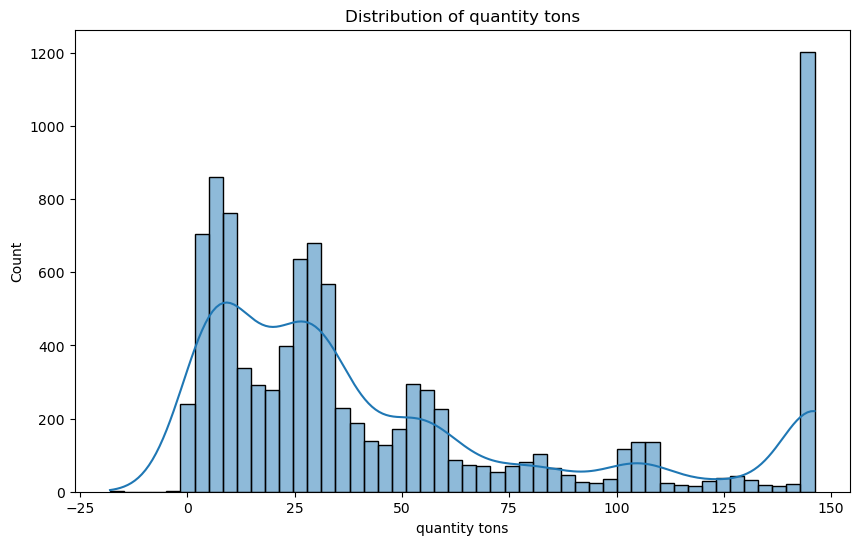

Processing column: customer
Skewness: 223.89387937162405
Using 10000 random samples from 150448 rows.


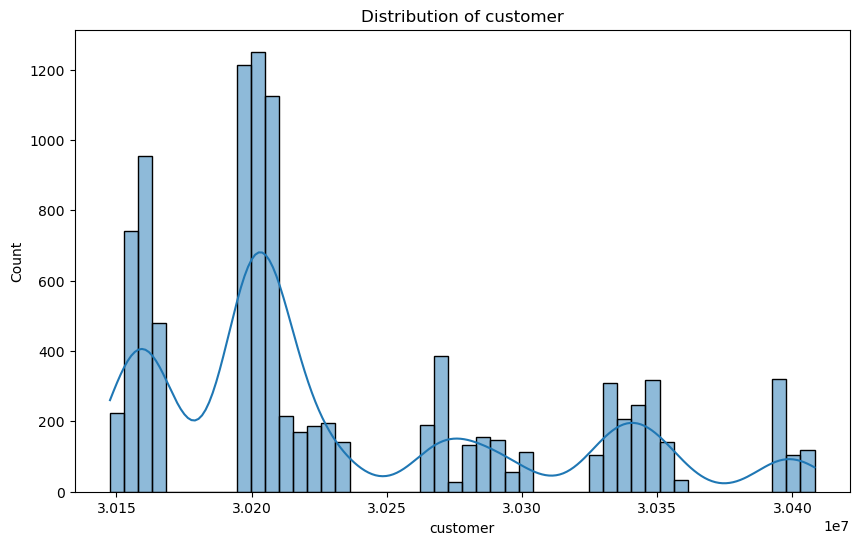

Processing column: country
Skewness: 0.4288700589178577
Using 10000 random samples from 150448 rows.


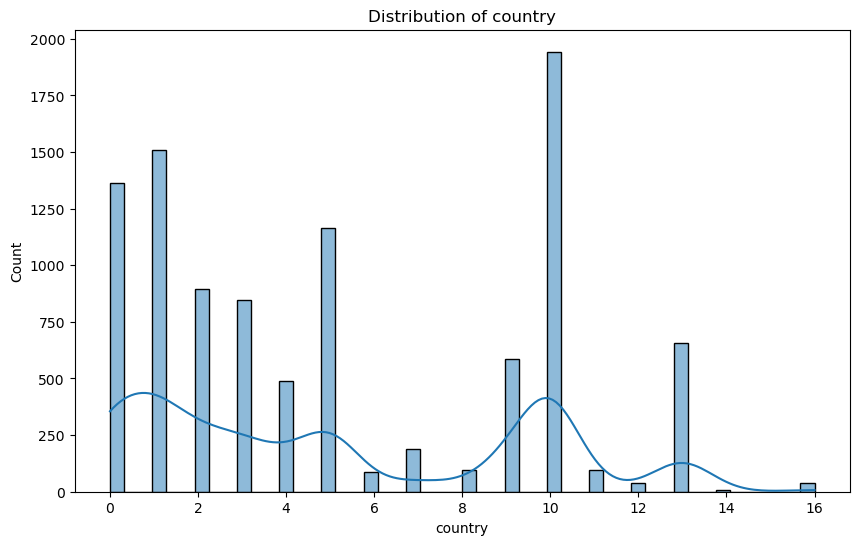

Processing column: status
Skewness: -1.2905616820539751
Using 10000 random samples from 150448 rows.


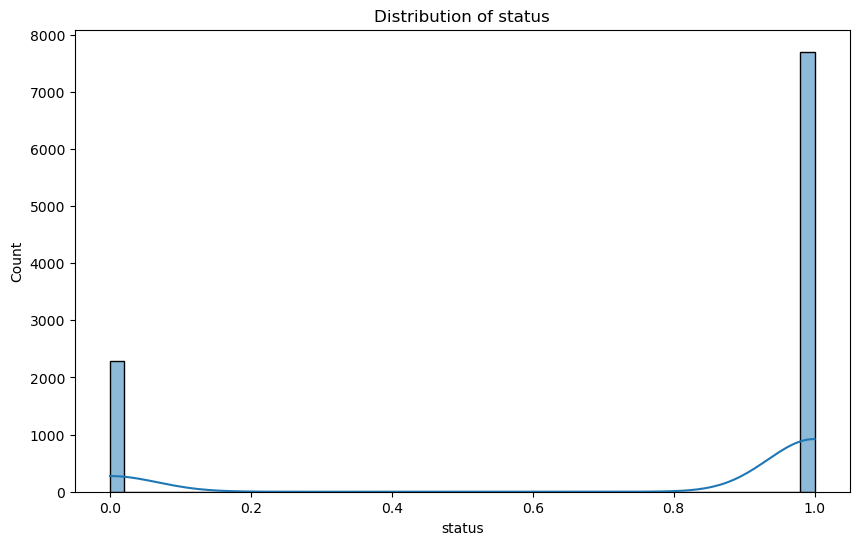

Processing column: item type
Skewness: -0.6192724962895593
Using 10000 random samples from 150448 rows.


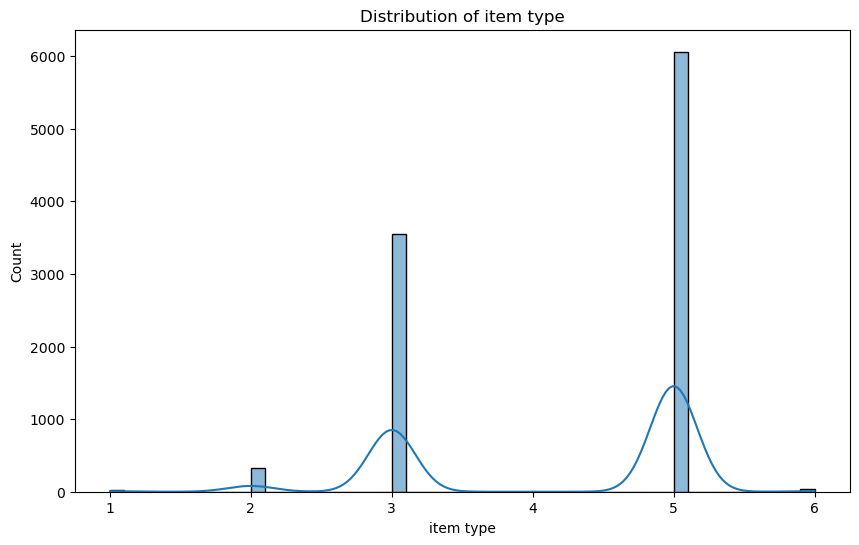

Processing column: application
Skewness: 0.49332561275383624
Using 10000 random samples from 150448 rows.


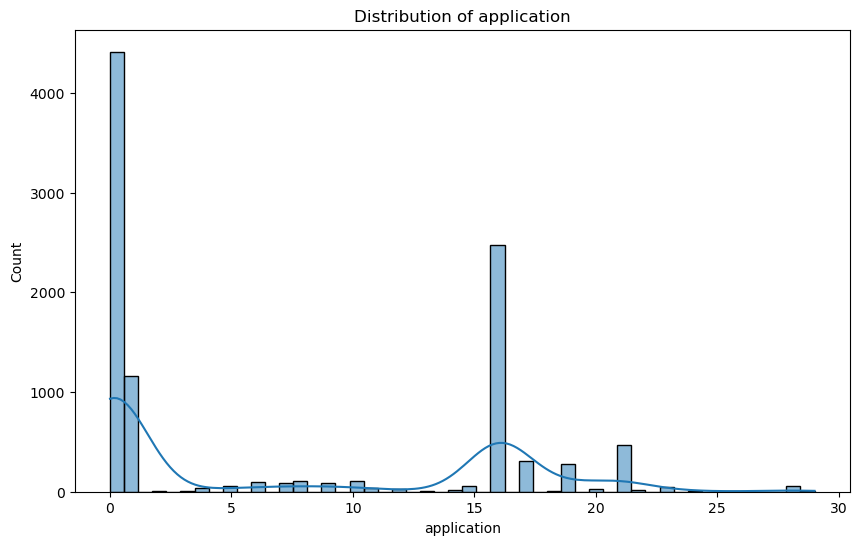

Processing column: thickness
Skewness: 1.0135159754516703
Using 10000 random samples from 150448 rows.


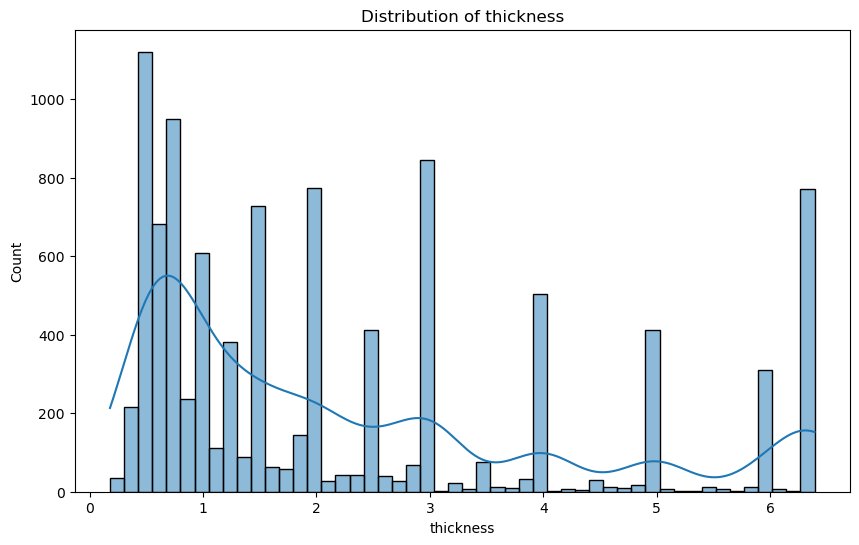

Processing column: width
Skewness: 0.6579606629157109
Using 10000 random samples from 150448 rows.


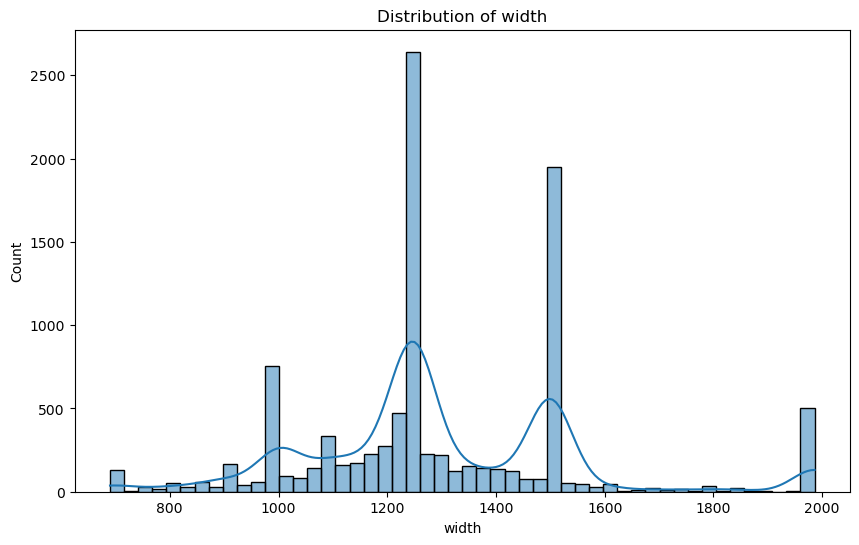

Processing column: material_ref
Skewness: -0.8455239183036365
Using 10000 random samples from 150448 rows.


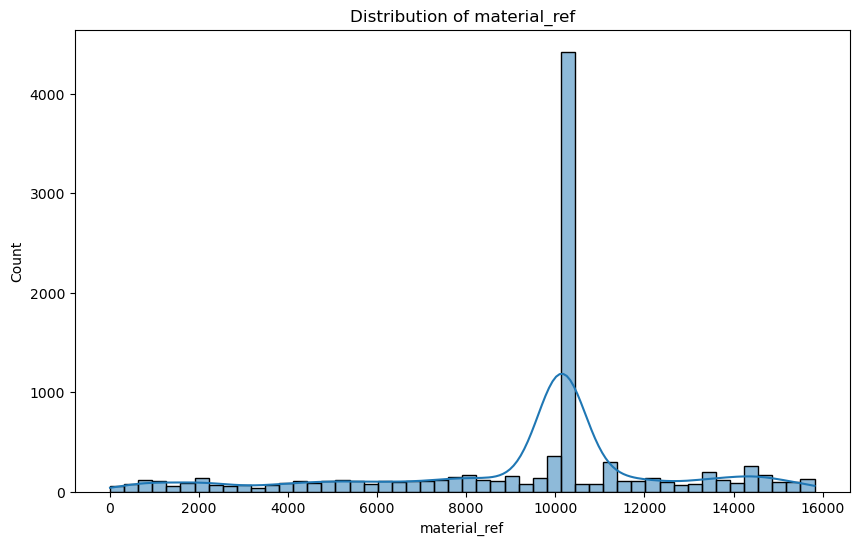

Processing column: product_ref
Skewness: 1.0134598112682567
Using 10000 random samples from 150448 rows.


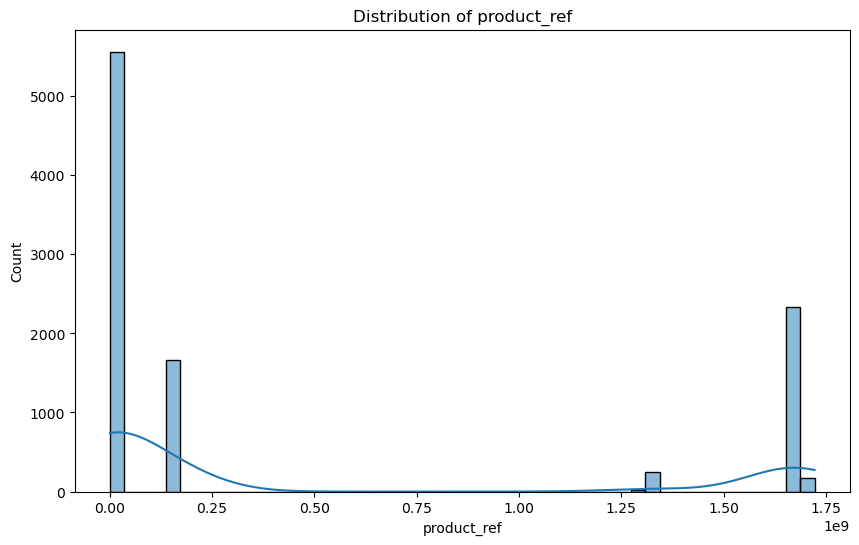

Processing column: selling_price
Skewness: 0.45094951994153143
Using 10000 random samples from 150448 rows.


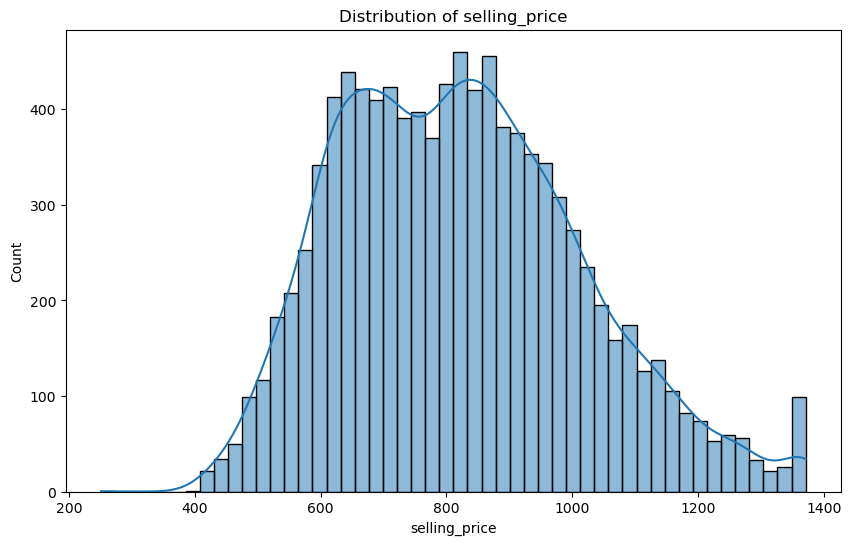

In [36]:
for col in columns:
    if pd.api.types.is_numeric_dtype(df[col]):  
        print(f"Processing column: {col}")
        
        print("Skewness:", df[col].skew())
        
        df_sampled = df.sample(n=10000, random_state=42)
        print(f"Using {len(df_sampled)} random samples from {len(df)} rows.")
        
        plt.figure(figsize=(10, 6))
        sns.histplot(df_sampled[col], kde=True, bins=50)
        plt.title(f"Distribution of {col}")
        plt.show()

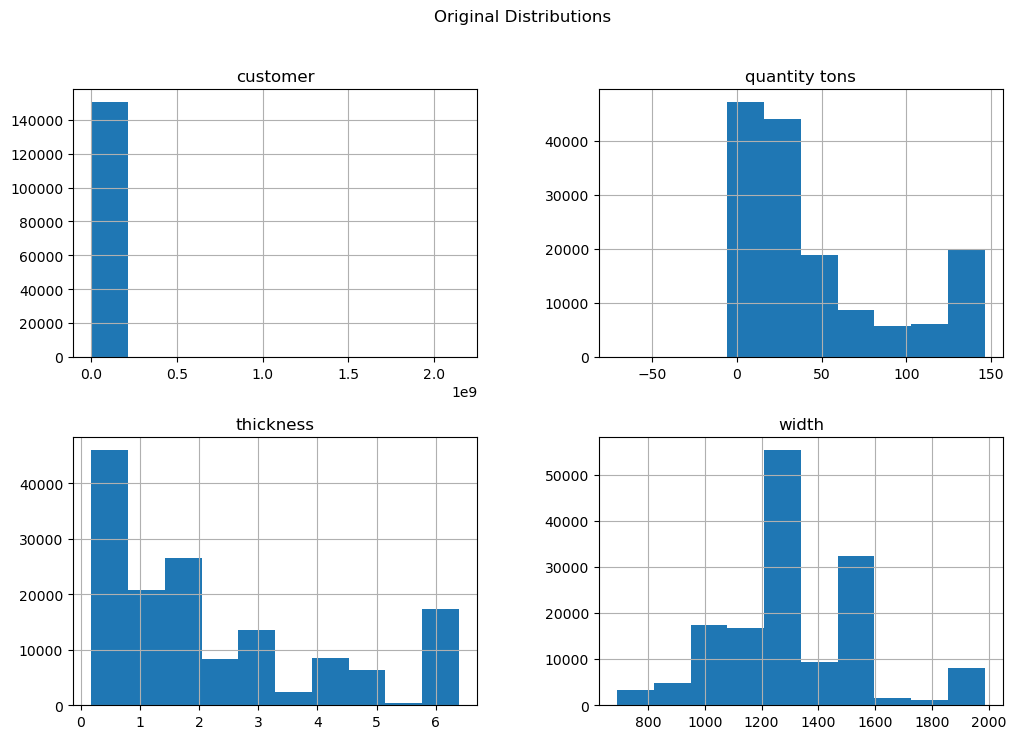

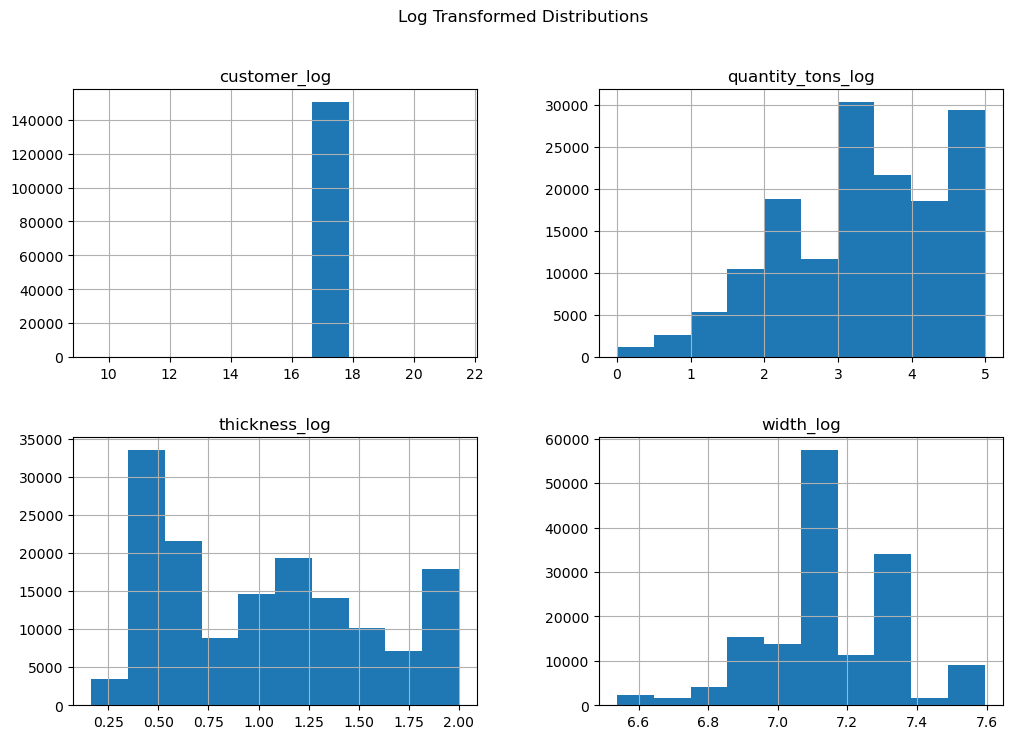

,customer,customer_log,quantity tons,quantity_tons_log,thickness,thickness_log,width,width_log
0,30156308.0,17.221905,54.151139,4.010077,2.00,1.098612,1500.0,7.313887
1,30202938.0,17.223450,146.120141,4.991250,0.80,0.587787,1210.0,7.099202
2,30153963.0,17.221827,146.120141,4.991250,0.38,0.322083,952.0,6.859615
3,30349574.0,17.228293,146.120141,4.991250,2.30,1.193922,1317.0,7.183871
4,30211560.0,17.223735,146.120141,4.991250,4.00,1.609438,1986.0,7.594381


In [37]:
import pandas as pd
import numpy as np

df[['customer', 'quantity tons', 'thickness', 'width']].hist(figsize=(12, 8))
plt.suptitle("Original Distributions")
plt.show()

df['customer_log'] = np.log1p(df['customer'])
df['quantity_tons_log'] = np.log1p(df['quantity tons'])
df['thickness_log'] = np.log1p(df['thickness'])
df['width_log'] = np.log1p(df['width'])

df[['customer_log', 'quantity_tons_log', 'thickness_log', 'width_log']].hist(figsize=(12, 8))
plt.suptitle("Log Transformed Distributions")
plt.show()

df[['customer', 'customer_log', 'quantity tons', 'quantity_tons_log', 'thickness', 'thickness_log', 'width', 'width_log']].head()

In [38]:
df.drop(columns='id',inplace=True)
df.drop_duplicates(inplace=True)
df.shape

(150196, 23)

Processing column: quantity tons
Skewness: 1.1106056504941204
Using 10000 random samples from 150196 rows.


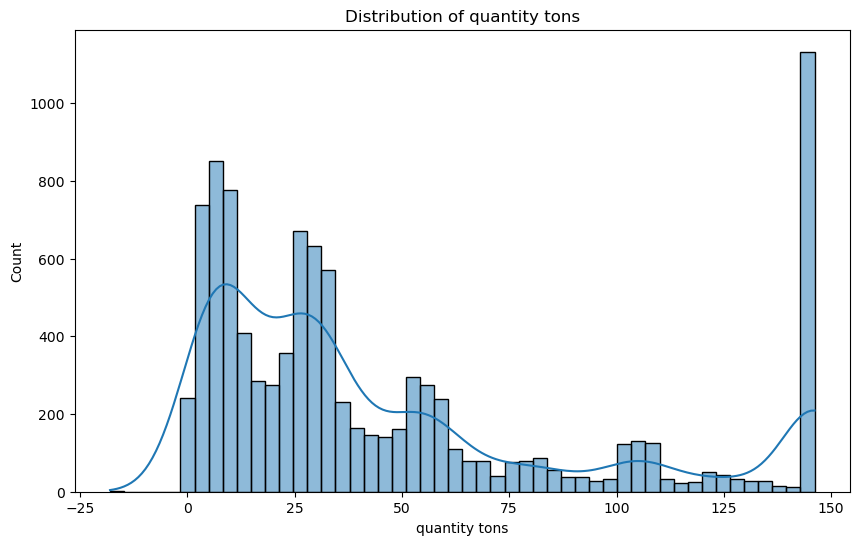

Processing column: customer
Skewness: 223.70631519069667
Using 10000 random samples from 150196 rows.


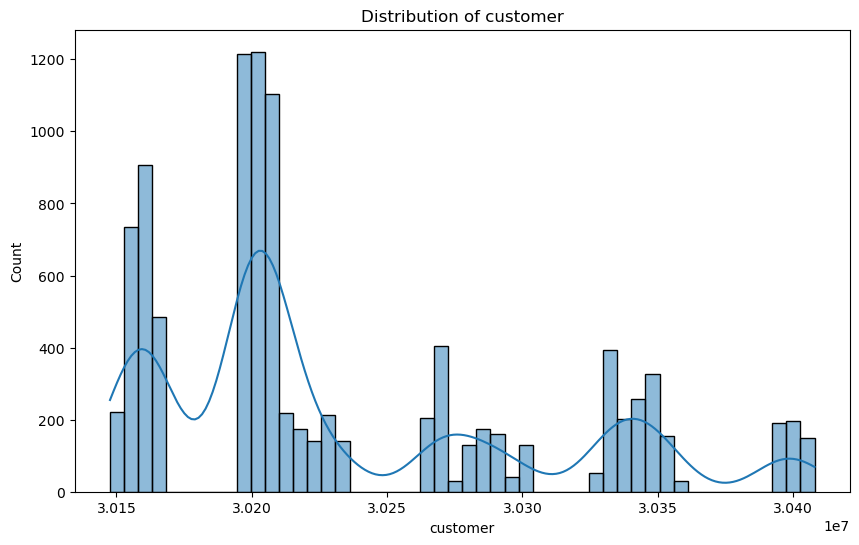

Processing column: country
Skewness: 0.4282073422623848
Using 10000 random samples from 150196 rows.


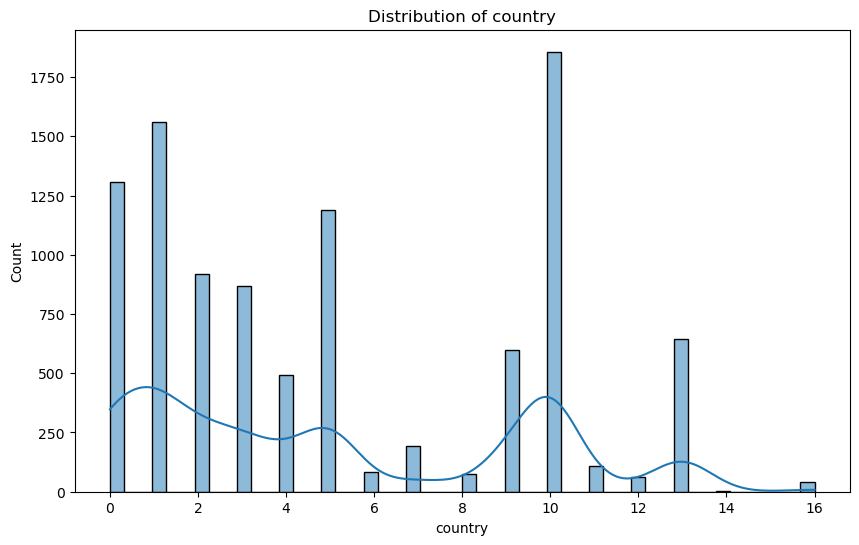

Processing column: status
Skewness: -1.2894091546764515
Using 10000 random samples from 150196 rows.


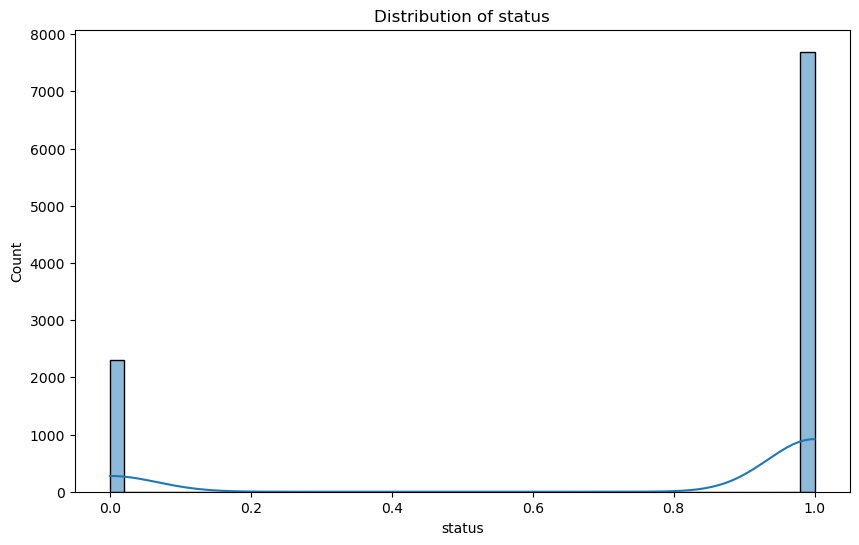

Processing column: item type
Skewness: -0.6193134632572065
Using 10000 random samples from 150196 rows.


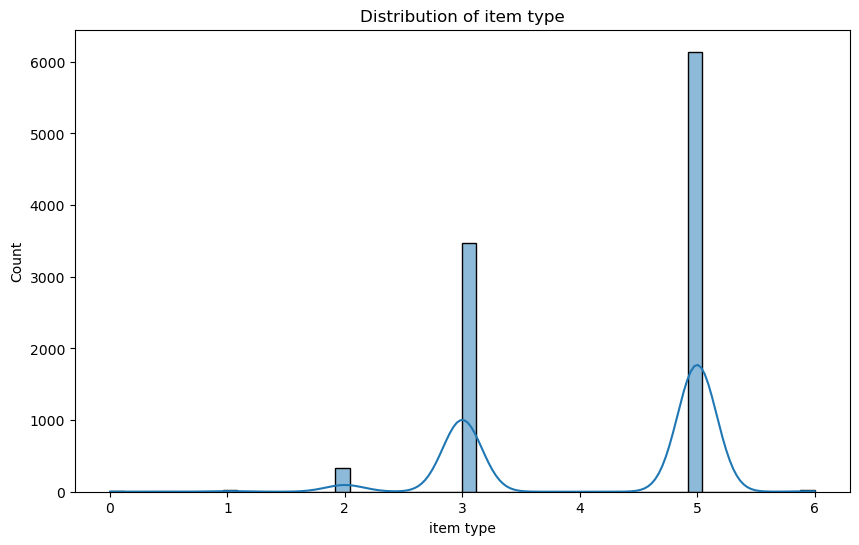

Processing column: application
Skewness: 0.494861418679709
Using 10000 random samples from 150196 rows.


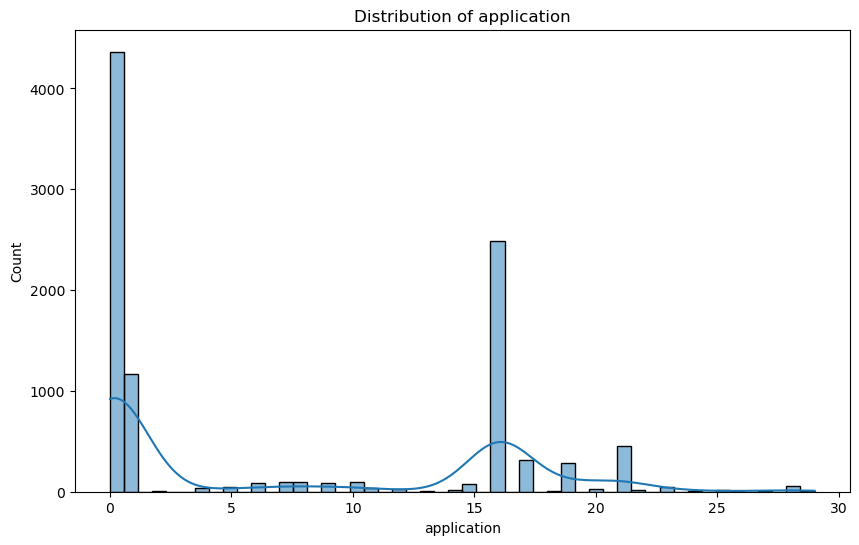

Processing column: thickness
Skewness: 1.014029263732029
Using 10000 random samples from 150196 rows.


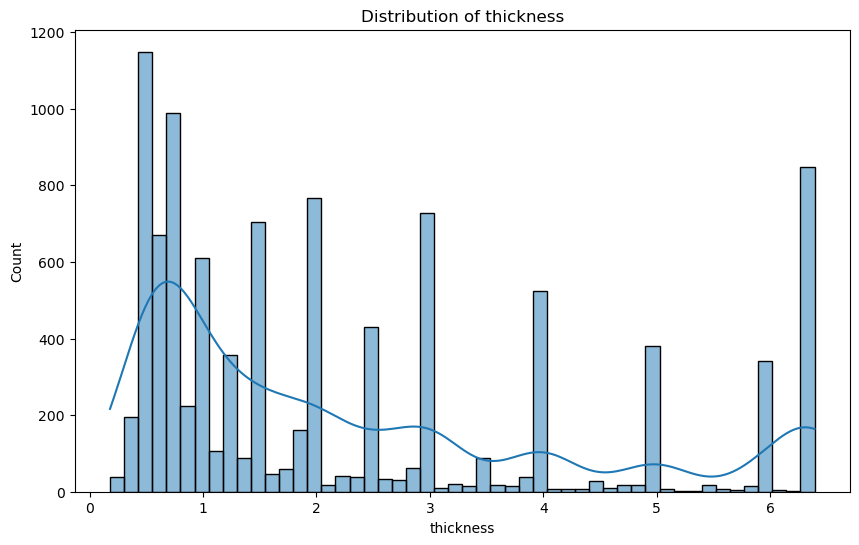

Processing column: width
Skewness: 0.6586811273201585
Using 10000 random samples from 150196 rows.


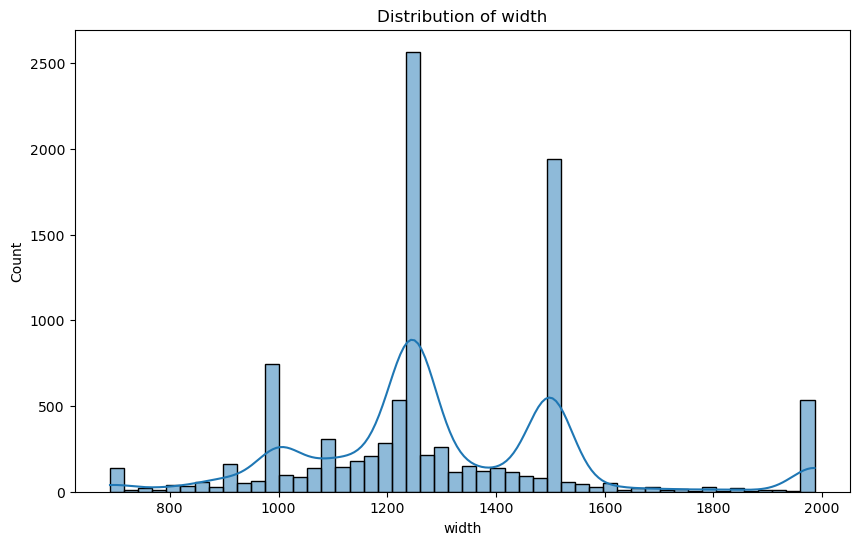

Processing column: material_ref
Skewness: -0.8465013138065212
Using 10000 random samples from 150196 rows.


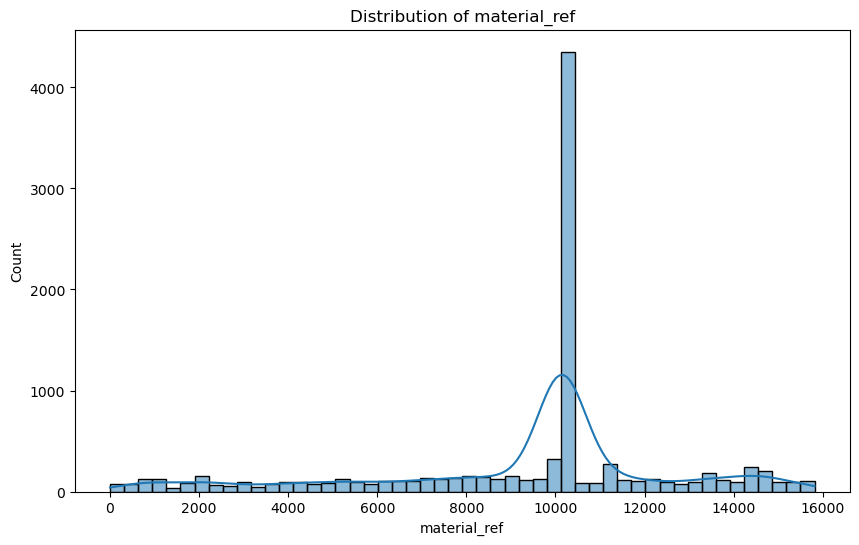

Processing column: product_ref
Skewness: 1.0132783506357423
Using 10000 random samples from 150196 rows.


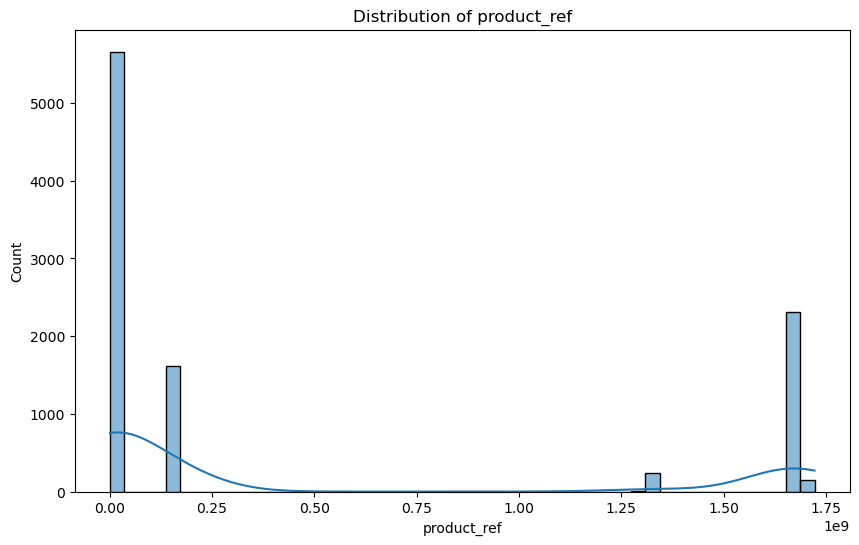

Processing column: selling_price
Skewness: 0.4498398377046593
Using 10000 random samples from 150196 rows.


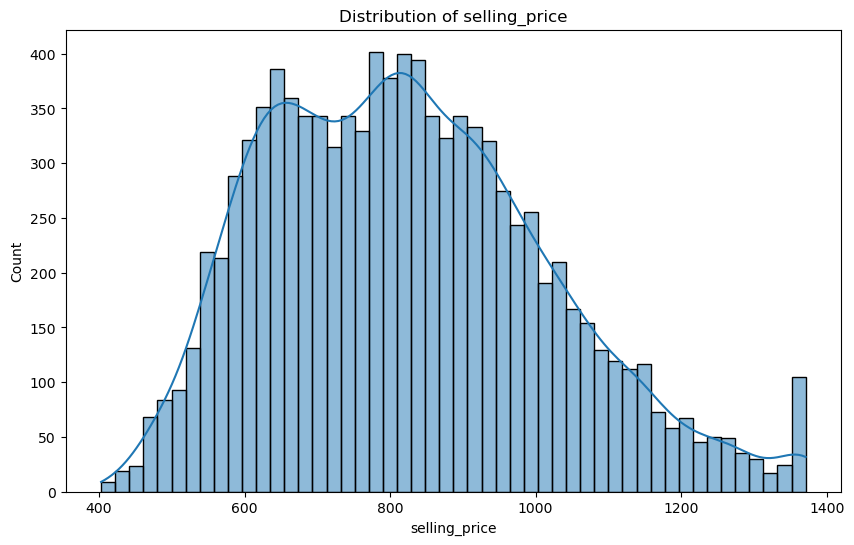

Processing column: item_date_year
Skewness: 0.0
Using 10000 random samples from 150196 rows.


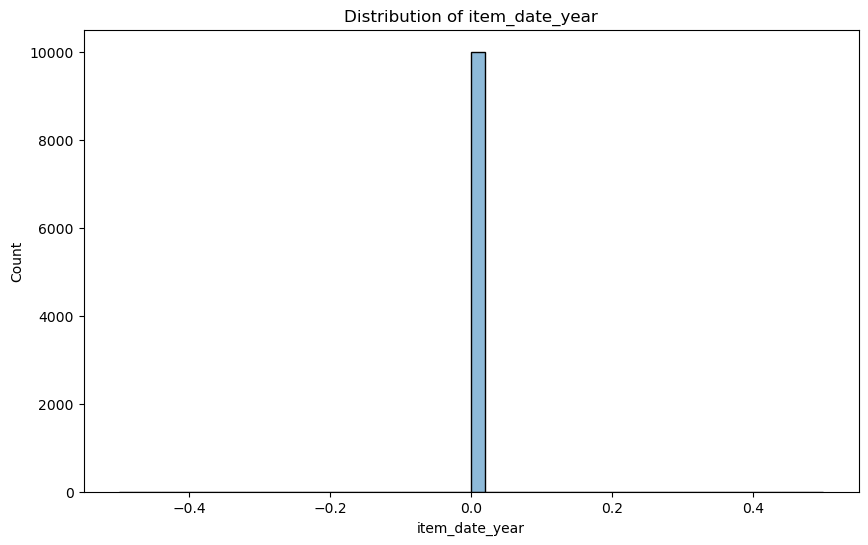

Processing column: item_date_month
Skewness: 0.0
Using 10000 random samples from 150196 rows.


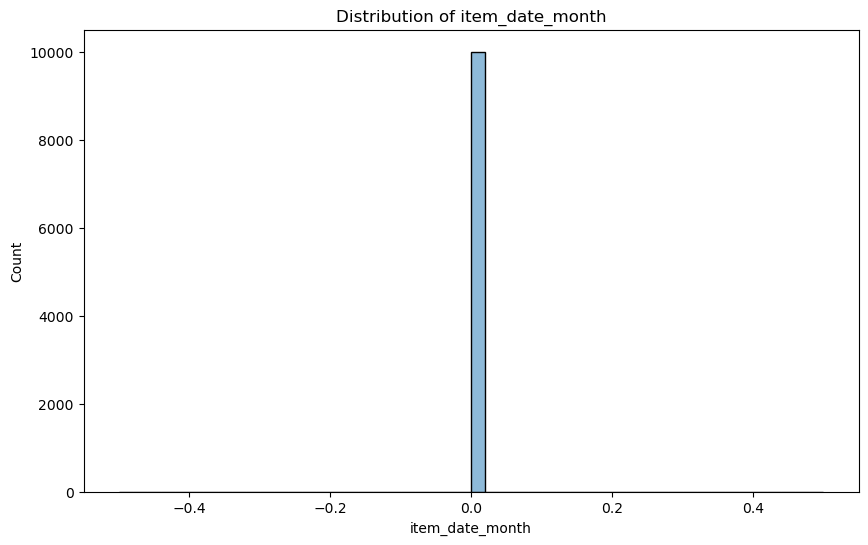

Processing column: item_date_day
Skewness: -387.5512869285824
Using 10000 random samples from 150196 rows.


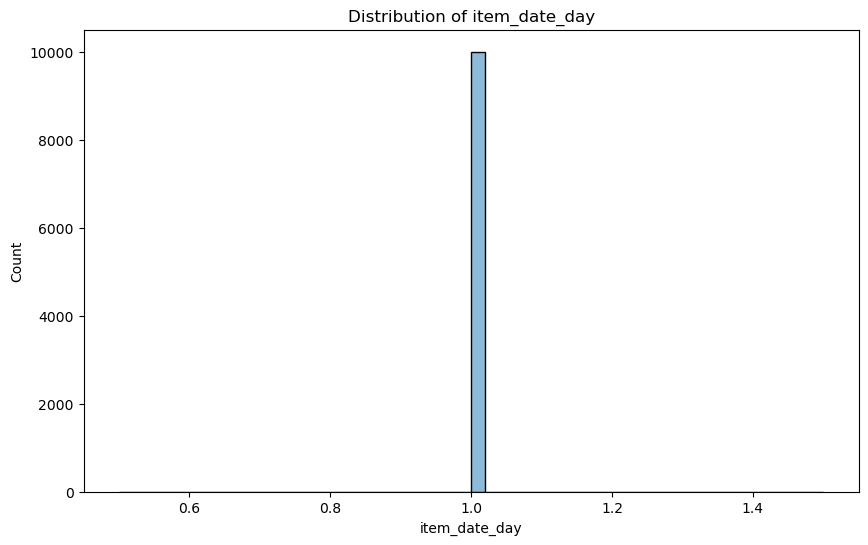

Processing column: delivery date year
Skewness: 0.0
Using 10000 random samples from 150196 rows.


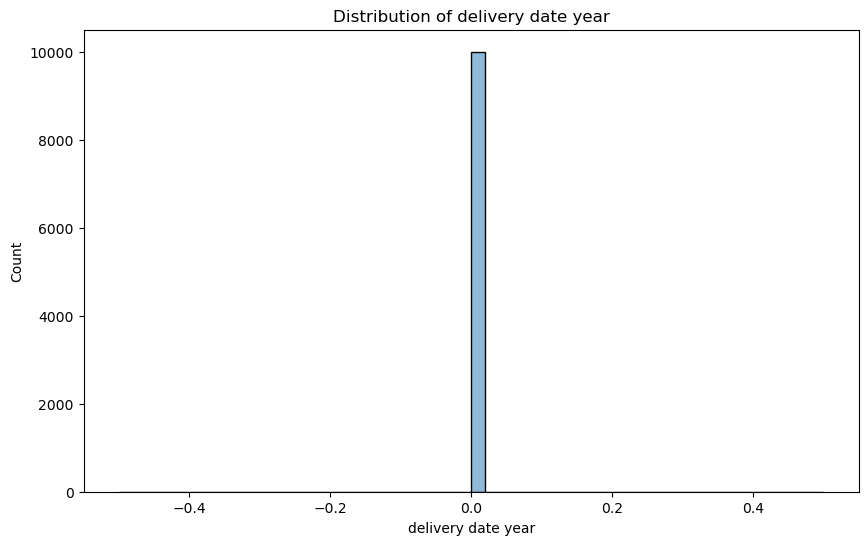

Processing column: delivery date month
Skewness: 0.0
Using 10000 random samples from 150196 rows.


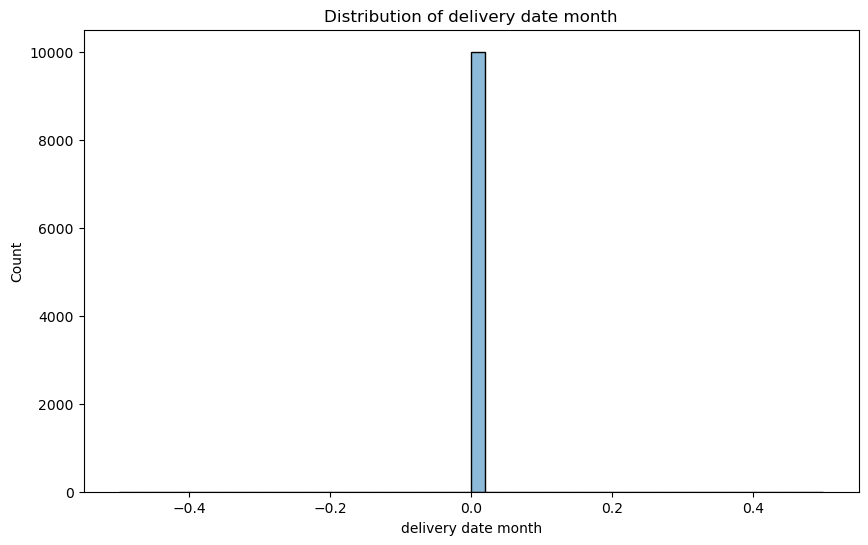

Processing column: delivery date day
Skewness: 158.20924958918025
Using 10000 random samples from 150196 rows.


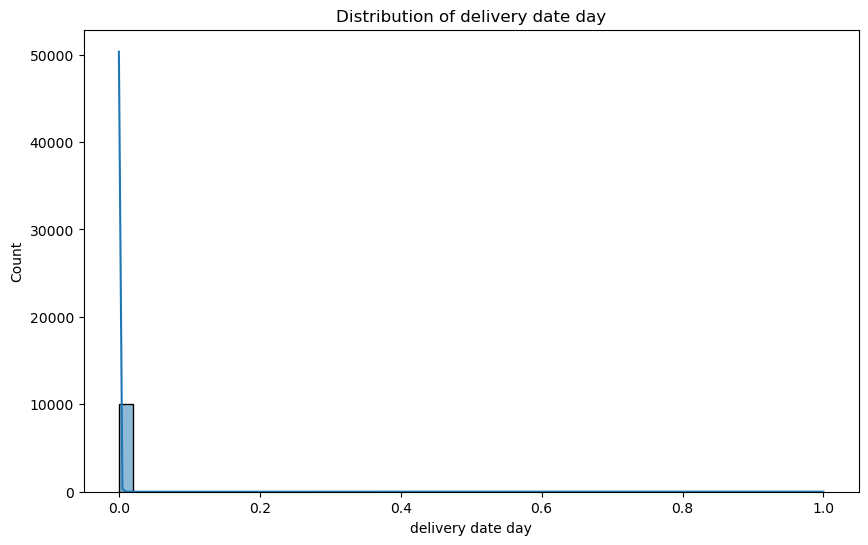

Processing column: customer_log
Skewness: -74.68031272017734
Using 10000 random samples from 150196 rows.


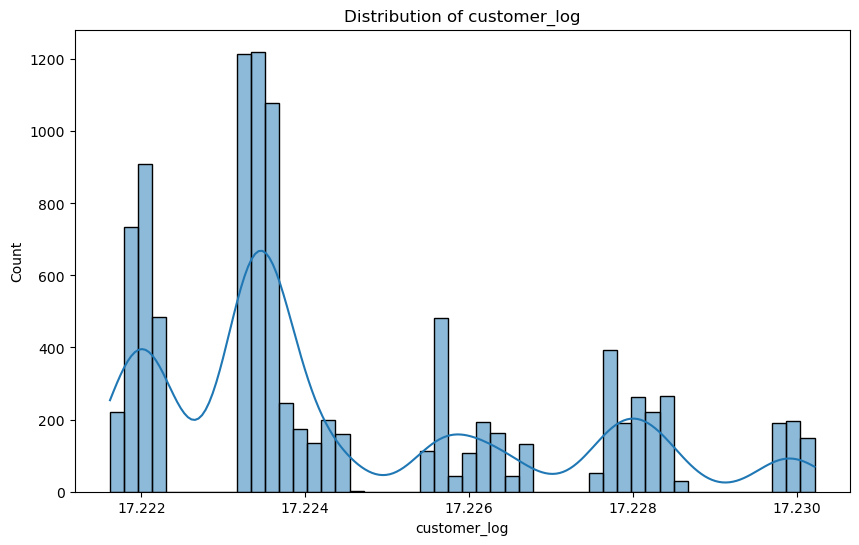

Processing column: quantity_tons_log
Skewness: -0.3759622170559435
Using 10000 random samples from 150196 rows.


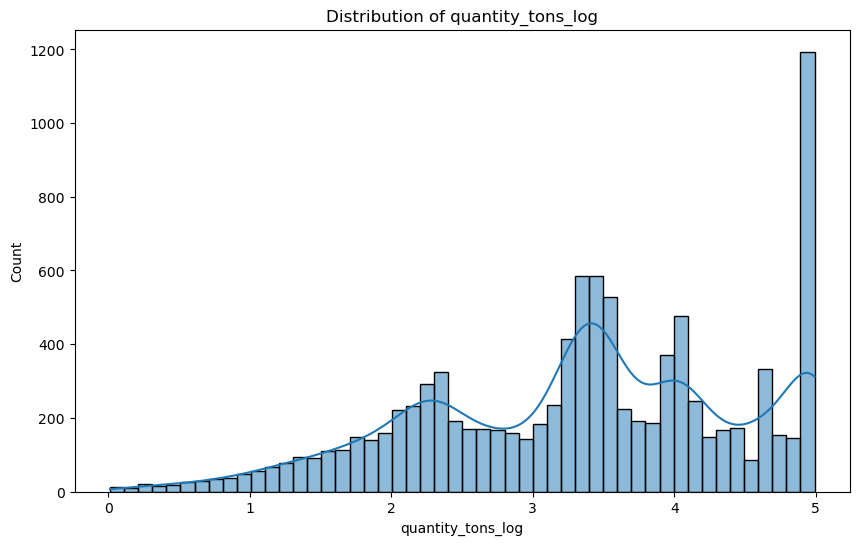

Processing column: thickness_log
Skewness: 0.4272039332035101
Using 10000 random samples from 150196 rows.


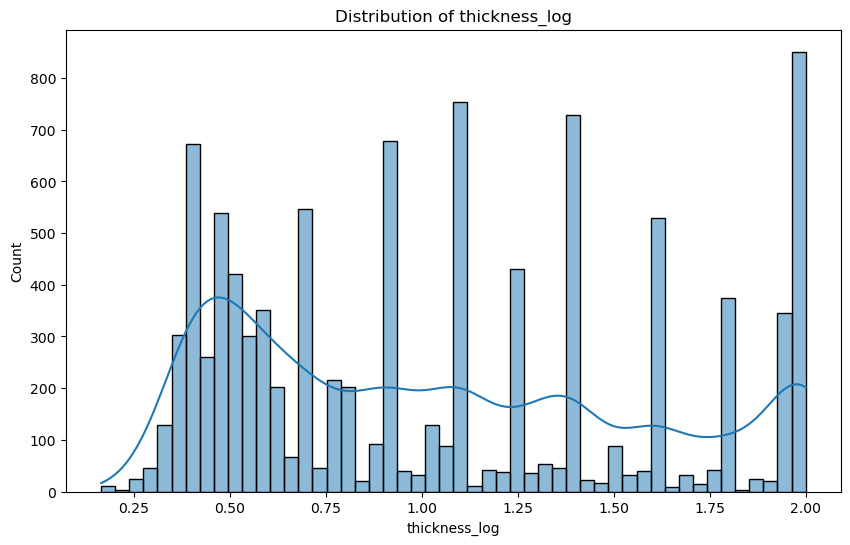

Processing column: width_log
Skewness: -0.1559003958625061
Using 10000 random samples from 150196 rows.


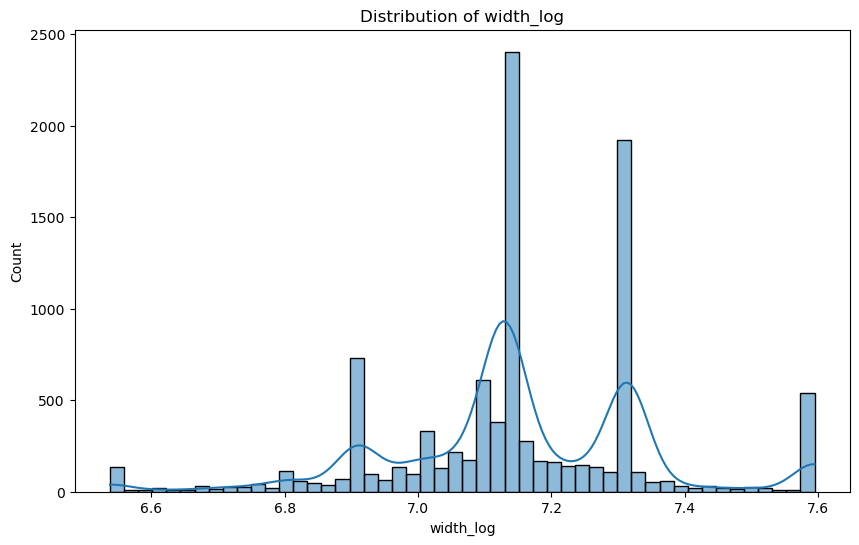

In [39]:
columns = df.columns.tolist()
for col in columns:
    if pd.api.types.is_numeric_dtype(df[col]):  
        print(f"Processing column: {col}")
        
        print("Skewness:", df[col].skew())
        
        df_sampled = df.sample(n=10000, random_state=42)
        print(f"Using {len(df_sampled)} random samples from {len(df)} rows.")
        
        plt.figure(figsize=(10, 6))
        sns.histplot(df_sampled[col], kde=True, bins=50)
        plt.title(f"Distribution of {col}")
        plt.show()

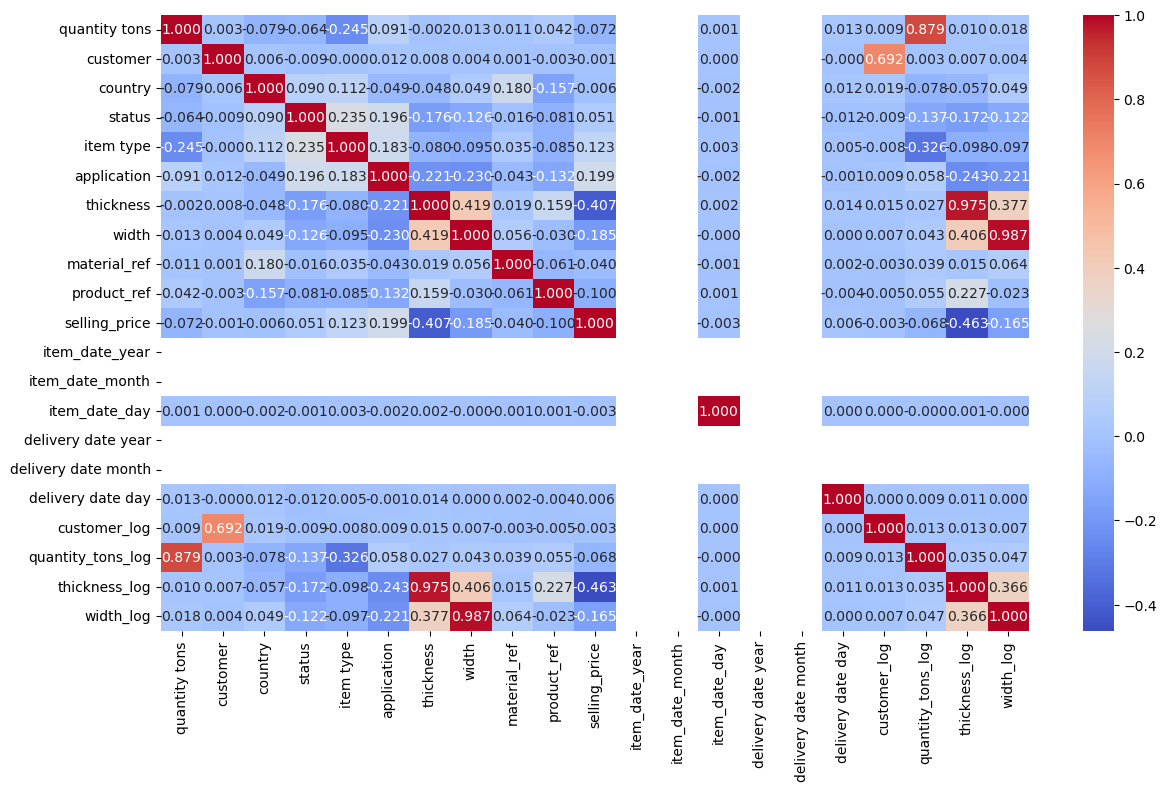

In [40]:
numeric_columns = df.select_dtypes(include=['number']).columns
df_heatmap = df[numeric_columns].corr()
plt.figure(figsize=(14, 8))
sns.heatmap(df_heatmap, annot=True, fmt='.3f', cmap='coolwarm')
plt.show()

In [41]:
df.drop_duplicates(inplace=True)
df.shape

(150196, 23)

In [42]:
df.to_csv('Copper_Set_processed.csv', index=False)

In [43]:
import os
os.path.abspath('Copper_Set_processed.csv')

'C:\\Users\\Gowtham\\Copper_Set_processed.csv'

In [44]:
df.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,...,item_date_year,item_date_month,item_date_day,delivery date year,delivery date month,delivery date day,customer_log,quantity_tons_log,thickness_log,width_log
0,1970-08-22,54.151139,30156308.0,3,1,5,0,2.00,1500.0,10049,...,0,0,1,0,0,0,17.221905,4.010077,1.098612,7.313887
1,1970-08-22,146.120141,30202938.0,0,1,5,16,0.80,1210.0,1146,...,0,0,1,0,0,0,17.223450,4.991250,0.587787,7.099202
2,1970-08-22,146.120141,30153963.0,4,1,6,9,0.38,952.0,14138,...,0,0,1,0,0,0,17.221827,4.991250,0.322083,6.859615
3,1970-08-22,146.120141,30349574.0,5,1,3,21,2.30,1317.0,10317,...,0,0,1,0,0,0,17.228293,4.991250,1.193922,7.183871
4,1970-08-22,146.120141,30211560.0,3,1,5,0,4.00,1986.0,6767,...,0,0,1,0,0,0,17.223735,4.991250,1.609438,7.594381


In [45]:
columns_to_drop = ['quantity tons', 'customer', 'country', 
                   'item_date_day', 'item_date_month', 'item_date_year', 'delivery date month', 
                   'delivery date day', 'delivery date year', 'thickness', 'width']

df.drop(columns=columns_to_drop, inplace=True)

df.head()

,item_date,status,item type,application,material_ref,product_ref,delivery date,selling_price,customer_log,quantity_tons_log,thickness_log,width_log
0,1970-08-22,1,5,0,10049,1670798778,1970-08-22,854.00,17.221905,4.010077,1.098612,7.313887
1,1970-08-22,1,5,16,1146,1668701718,1970-08-22,1047.00,17.223450,4.991250,0.587787,7.099202
2,1970-08-22,1,6,9,14138,628377,1970-08-22,644.33,17.221827,4.991250,0.322083,6.859615
3,1970-08-22,1,3,21,10317,1668701718,1970-08-22,768.00,17.228293,4.991250,1.193922,7.183871
4,1970-08-22,1,5,0,6767,640665,1970-08-22,577.00,17.223735,4.991250,1.609438,7.594381


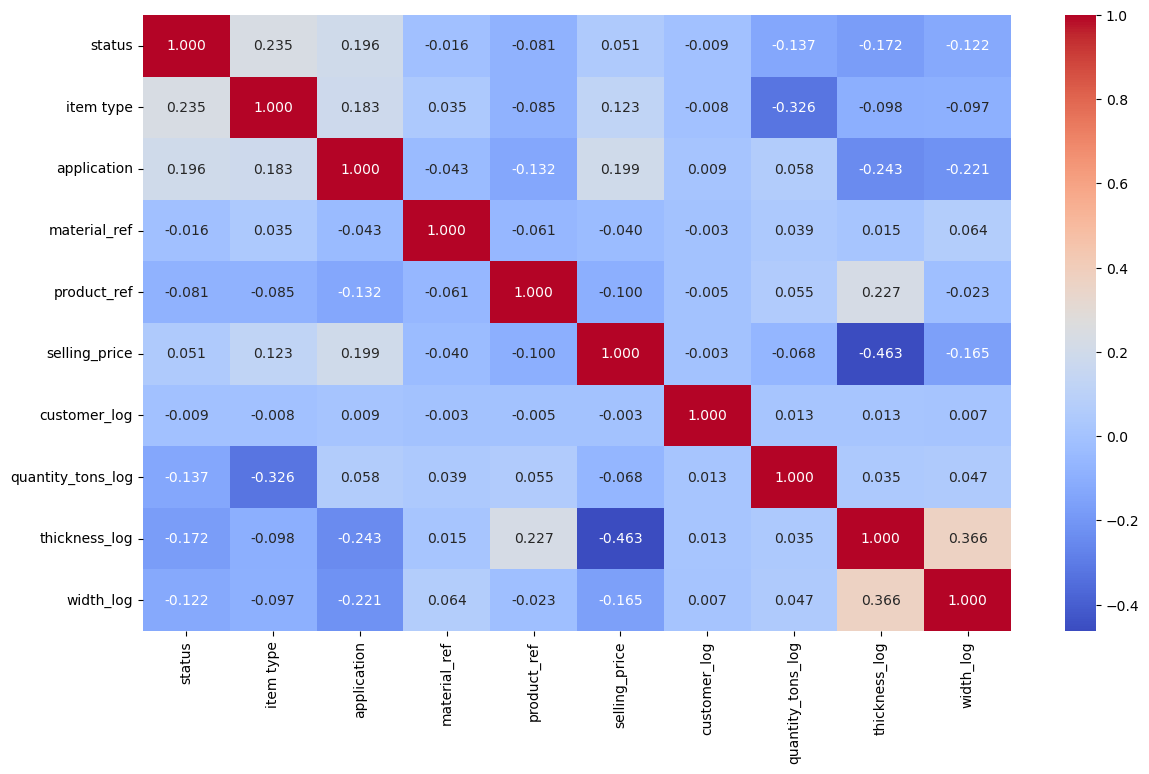

In [46]:
numeric_columns = df.select_dtypes(include=['number']).columns
df_heatmap = df[numeric_columns].corr()
plt.figure(figsize=(14, 8))
sns.heatmap(df_heatmap, annot=True, fmt='.3f', cmap='coolwarm')
plt.show()

In [93]:
df.to_csv('Copper_Set_processed.csv', index=False)

In [95]:
os.path.abspath('Copper_Set_processed.csv')

'C:\\Users\\Gowtham\\Copper_Set_processed.csv'